# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing first data cleaning, formatting, and structuring.

In [1]:
import numpy as np
import pandas as pd 

marketing = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv')
marketing.shape
marketing.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [2]:
"""We create a new dataframe filtered
To do that we first create a new df name
Then, we add the values we want to filter in the data frame

When we have more than one filter to be applied, each of them, have to go inside of a "()", and the total of them inside oh " [] "
(marketing['Total Claim Amount'] > 1000.00)
(marketing['Response'] == 'Yes')
"""

marketing_new = marketing[(marketing['Total Claim Amount'] > 1000.00) & (marketing['Response'] == 'Yes')]
display(marketing_new)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
189,189,OK31456,California,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,NaN
236,236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,...,0.0,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,A
419,419,GW43195,Oregon,25807.063000,Yes,Extended,College,2/13/11,Employed,F,...,1.0,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury Car,Small,A
442,442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2/13/11,Disabled,F,...,0.0,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize,A
587,587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,1/26/11,Unemployed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,10351,FN44127,Oregon,3508.569533,Yes,Extended,College,1/5/11,Medical Leave,M,...,1.0,1,Personal Auto,Personal L2,Offer2,Branch,1176.278800,Four-Door Car,Small,NaN
10373,10373,XZ64172,Oregon,10963.957230,Yes,Premium,High School or Below,2/8/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer1,Agent,1324.800000,Luxury SUV,Medsize,NaN
10487,10487,IX60941,Oregon,3508.569533,Yes,Extended,College,1/5/11,Medical Leave,M,...,1.0,1,Personal Auto,Personal L3,Offer2,Branch,1176.278800,Four-Door Car,Small,NaN
10565,10565,QO62792,Oregon,7840.165778,Yes,Extended,College,1/14/11,Employed,M,...,2.0,1,Personal Auto,Personal L3,Offer2,Agent,1008.000000,NaN,NaN,NaN


In [3]:
marketing_new.value_counts('Response')

Response
Yes    67
Name: count, dtype: int64

2. Using the original dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [4]:
"""We create a function to filter a dataframe and create a pivot.table.
We want to know which is the average total_claim_amount, filteres by each policy type and gender , 
but, only for customers who have responded yes.

To to that we use create a new dataframe and using groupby 
1.- First we add a name to the new dataframe
2.- Then add the filter to know which customers have responded yes
3.- Once we have the filtered apply we can create the groupby function
we select the columns and then the columns that contains the values we want to know and applied the aggregations function
- Columns: groupby(["Policy Type","Gender"])
- Values: [["Total Claim Amount"]].mean().round(2)

The values have to go inside of " [] " to be displayed as a dataframe, if not, it will be displayed as a panda series

"""

pivot_1=marketing[marketing['Response'] == 'Yes'].groupby(["Policy Type","Gender"])[["Total Claim Amount"]].mean().round(2)
display(pivot_1)

Total Claim Amount
Policy Type    Gender                    
Corporate Auto F                   433.74
               M                   408.58
Personal Auto  F                   452.97
               M                   457.01
Special Auto   F                   453.28
               M                   429.53

In [5]:
pivot2=marketing[marketing['Response'] == 'Yes'].pivot_table(index=['Policy Type','Gender'],aggfunc={"Total Claim Amount":'mean'}).round(2)
display(pivot2)

Total Claim Amount
Policy Type    Gender                    
Corporate Auto F                   433.74
               M                   408.58
Personal Auto  F                   452.97
               M                   457.01
Special Auto   F                   453.28
               M                   429.53

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [6]:
customers=marketing[['Customer','Number of Policies','State']].pivot_table(index=['State','Number of Policies'], aggfunc={"Customer": 'count'})
display(customers)

Customer
State      Number of Policies          
Arizona    1                        671
           2                        483
           3                        231
           4                         88
           5                        107
           6                         82
           7                         95
           8                         78
           9                        102
California 1                       1234
           2                        889
           3                        475
           4                        172
           5                        166
           6                        131
           7                        173
           8                        158
           9                        154
Nevada     1                        382
           2                        259
           3                        126
           4                         33
           5                         23
           6                         54
           7                         44
           8                         34
           9                         38
Oregon     1                       1016
           2                        748
           3                        372
           4                        130
           5                        130
           6                        110
           7                        144
           8                        131
           9                        128
Washington 1                        346
           2                        217
           3                         97
           4                         37
           5                         37
           6                         28
           7                         44
           8                         35
           9                         47

-- >I could not find the function to do the total SUM of customers per each State - to be able to filter states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [7]:
""" From the original df, we create a new one with filters
We want to know:
New data frame
The value to know: maximum, minimum, and median --> customer lifetime value
filtered by: by education level and gender

To do that we create a groupby or a pivot.table and add aggregations

pivottable the aggfunc are added to the main function with a "," and inside of a "{}"  we indicate the columns+agg calculations
groupby the agg are added to the main function with a "." and then the columns + agg calculations 
"""

pivot4=marketing[["Customer Lifetime Value","Education","Gender"]].pivot_table(index=['Education','Gender'], aggfunc={"Customer Lifetime Value":['max','min','mean']}).round(2)
display(pivot4)

Customer Lifetime Value                  
                                                max     mean      min
Education            Gender                                          
Bachelor             F                     73225.96  7874.27  1904.00
                     M                     67907.27  7703.60  1898.01
College              F                     61850.19  7748.82  1898.68
                     M                     61134.68  8052.46  1918.12
Doctor               F                     44856.11  7328.51  2395.57
                     M                     32677.34  7415.33  2267.60
High School or Below F                     55277.45  8675.22  2144.92
                     M                     83325.38  8149.69  1940.98
Master               F                     51016.07  8157.05  2417.78
                     M                     50568.26  8168.83  2272.31

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month.

Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states with the highest number of policies sold.

*Hint:* 
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [8]:
# your code goes here

_______________

# lab-customer-analysis-round-3_final

1.- import numpy as np

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
mark_analysis = marketing.copy()
display(mark_analysis)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


2.- Describe info

In [11]:
mark_analysis.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


3.- Show a plot of the total number of responses

In [12]:
marketing.value_counts('Response')

Response
No     8813
Yes    1466
Name: count, dtype: int64

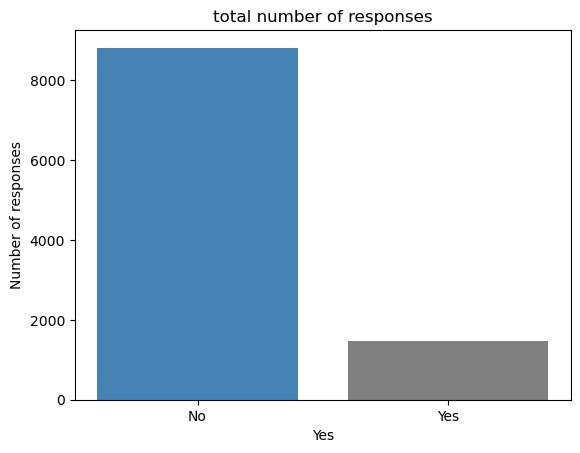

In [13]:
fig, ax = plt.subplots()
ax.bar(x = mark_analysis['Response'].value_counts().index, height = marketing['Response'].value_counts().values, color = ['steelblue', 'grey'])
ax.set_xlabel("Yes")
ax.set_ylabel("Number of responses")
ax.set_title("total number of responses")
plt.show()

4.- Show a plot of the response rate by the sales channel.

In [14]:
mark_analysis.value_counts("Sales Channel")

Sales Channel
Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: count, dtype: int64

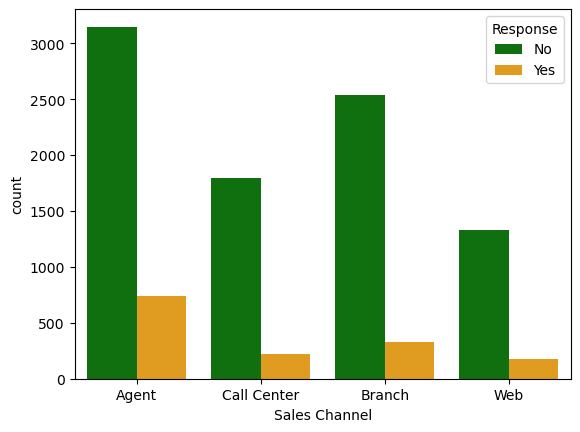

In [15]:
fig, ax = plt.subplots()
sns.countplot(data=mark_analysis, x="Sales Channel",  palette=['green', 'orange'], hue="Response")
plt.show()

5.- Show a plot of the response rate by the total claim amount.

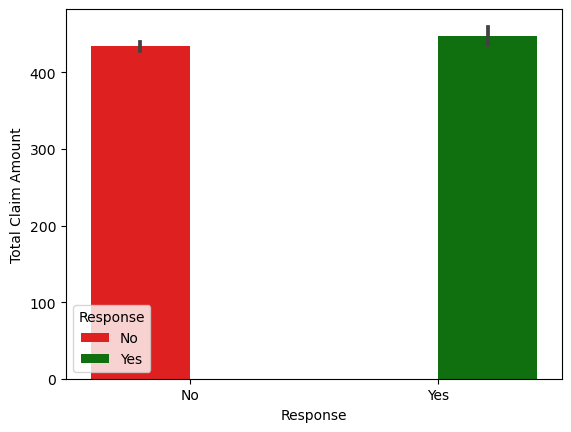

In [16]:
fig, ax = plt.subplots()
sns.barplot(data=mark_analysis, x='Response', y='Total Claim Amount', palette=['red', 'green'], ax = ax, hue='Response')
plt.show()

6.- Show a plot of the response rate by income.

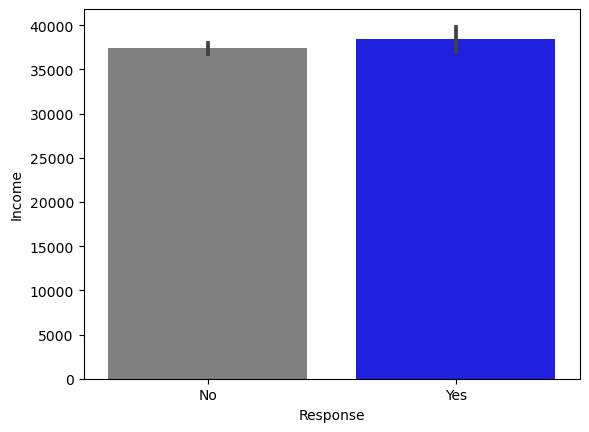

In [17]:
fig, ax = plt.subplots()
sns.barplot(data=mark_analysis, x='Response', y='Income', palette=['grey', 'blue'], ax = ax)
plt.show()

_______________

# Lab_Data Transformations

1.- Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [18]:
mark_transformations = marketing.copy()
display(mark_transformations)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [19]:
mark_transformations.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [22]:
"""Get the numeric data into dataframe called numerical"""

mk_numerical=mark_transformations._get_numeric_data()
display(mk_numerical)

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [23]:
mk_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10910.0,5454.500000,3149.590053,0.000000,2727.250000,5454.500000,8181.750000,10909.000000
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


In [24]:
mk_categorical=mark_transformations.select_dtypes(include=['object'])
display(mk_categorical)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


2.- Now we will try to check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.

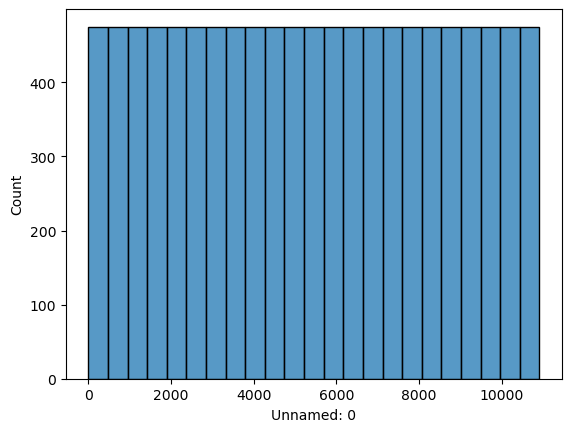

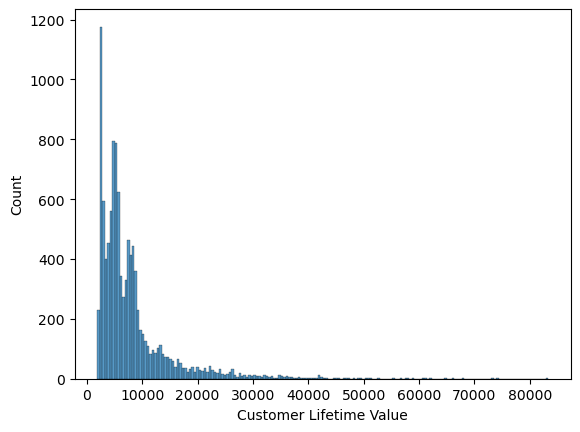

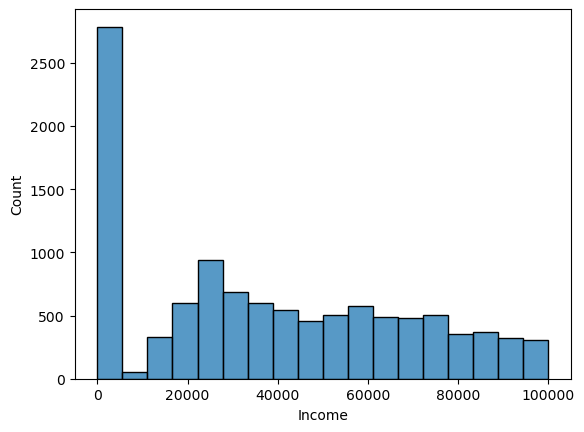

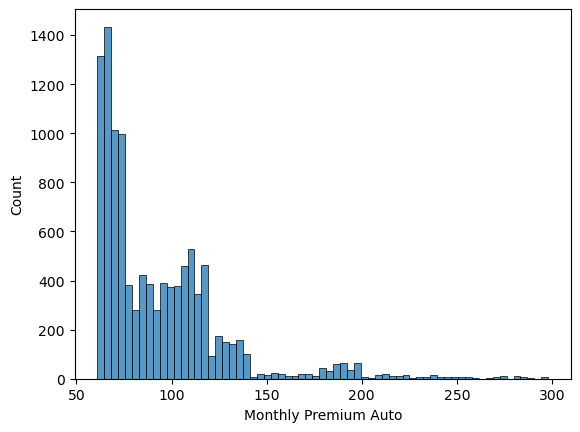

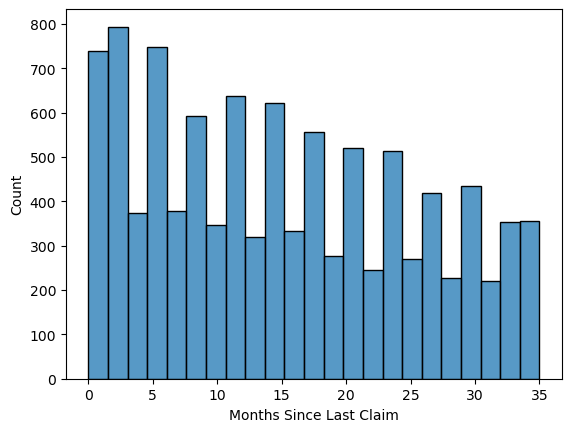

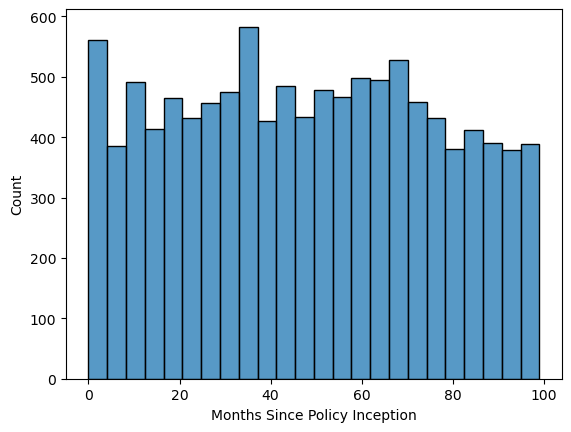

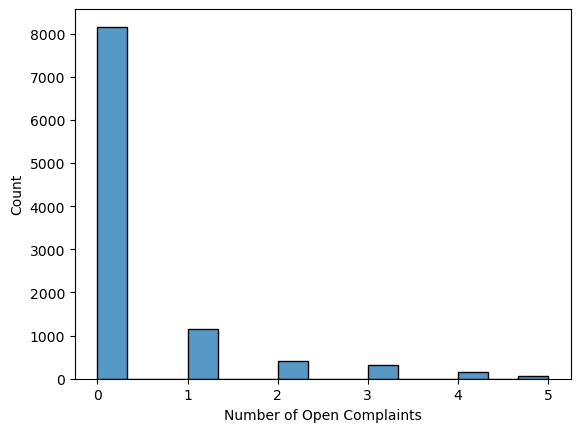

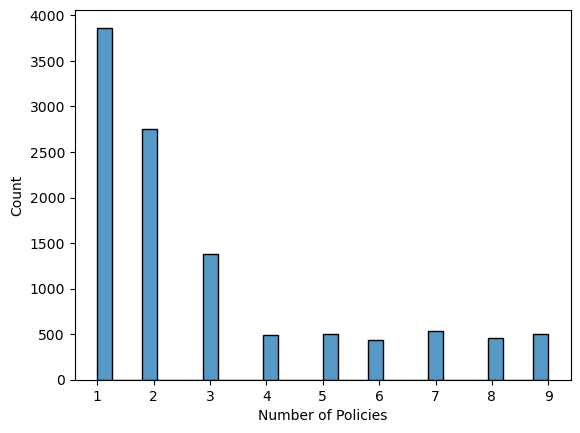

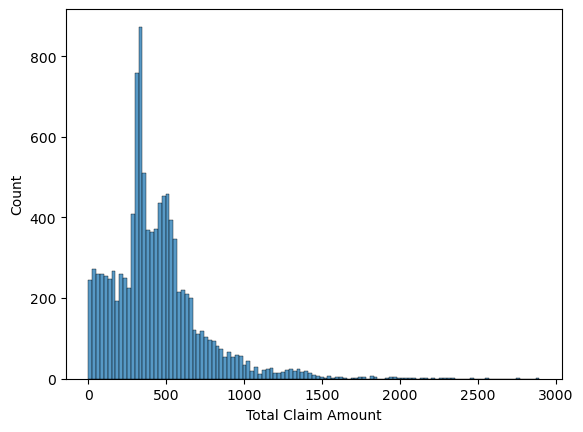

In [25]:
for i in mk_numerical.columns:
    sns.histplot(mk_numerical[i])
    plt.show()

    Question:
    
    Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.
    
    Response:

<  A distribution is said to be positively skewed when the tail on the right side of the histogram is longer than the left side >

Non,
All plots looks asymmetrical and clearly this is an skewness distributionare = in this case positive skew.
They have a right-skewed distribution what means that are longer on the right side of its peak than on its left.

3.- For the numerical variables, check the multicollinearity between the features. 

Please note that we will use the column total_claim_amount later as the target variable.

In [35]:
# Use VIF or manual multicollinearity calculation
# We will use manual multicollinearity calculation using Correlation matrix

# We first delete the column Unnamed: 0

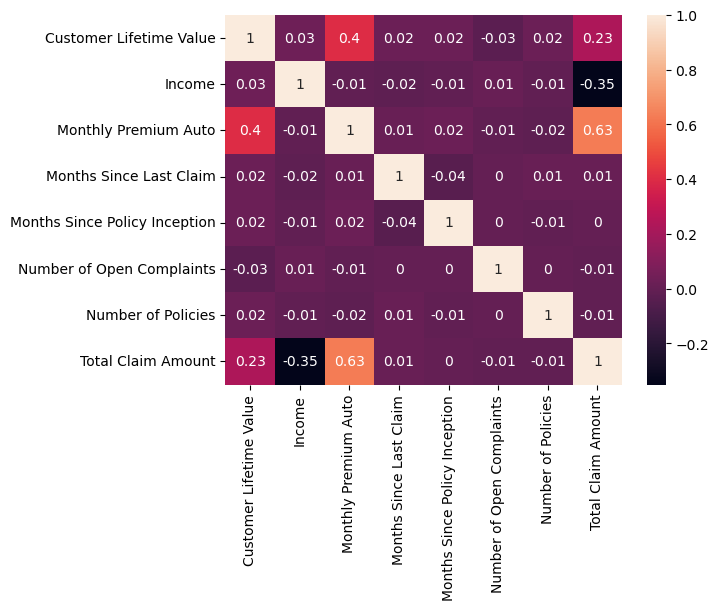

In [36]:
sns.heatmap(mk_numerical.iloc[:,1:].corr().round(2), annot=True);

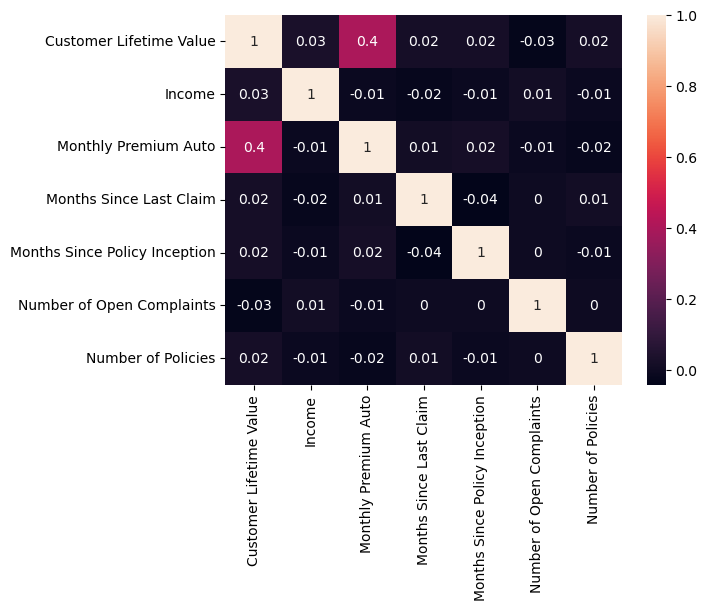

In [37]:
#Now we will descart the column "total_claim_amount" because is the one we want to predict
sns.heatmap(mk_numerical.iloc[:,1:-1].corr().round(2), annot=True);

4.- If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column total_claim_amount. 


Write code for both the correlation matrix. 
If there is no pair of features that have a high correlation, then do not drop any features.

    RESPONSE:
  We can see that there aren't columns with multicollinearity between the features because all of them are under <0,90. 
  So we don't need to drop any column because any of them are less corretalted with the column total_claim_amount

5.- Plot the heatmap of the correlation matrix after the filtering.

In [38]:
#i.e
#correlations_matrix = reg_data.corr()
#cmap=sns.color_palette("flare", as_cmap=True)
#sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
#plt.show()

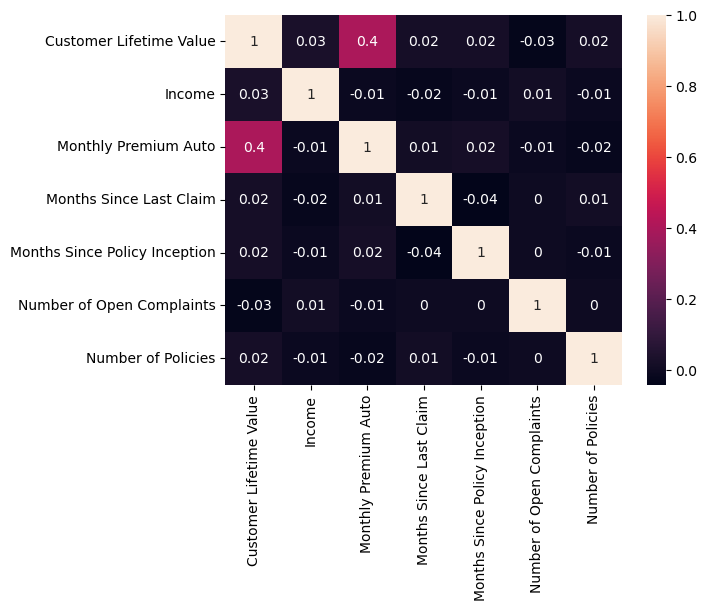

In [40]:
sns.heatmap(mk_numerical.iloc[:,1:-1].corr().round(2), annot=True);